In [ ]:
! pip install -q kaggle

In [1]:
# upload kaggle.json() file which is downloaded from kaggle as api key

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-10-21 20:52:33          14415  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           8678  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3857  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3230  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [ ]:
! kaggle competitions download -c dogs-vs-cats

train.zip: Skipping, found more recently modified local copy (use --force to force download)
sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
test1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile('test1.zip','r') as zp : 
  zp.extractall()

In [2]:
import os

In [ ]:
first_img = os.path.join('train',os.listdir('train')[3])

In [ ]:
first_img

'train/cat.4253.jpg'

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import cv2

In [ ]:
img = cv2.imread(first_img)

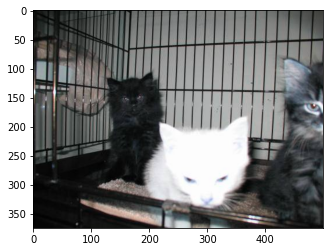

In [ ]:
plt.imshow(img)

In [ ]:
first_img

'train/cat.4253.jpg'

In [4]:
data = []
for pt in os.listdir('train') : 
  zo = 0
  if pt.split('.')[0] == 'dog' : 
    zo = 0
  else :
    zo = 1
  path = os.path.join('train',pt)
  img = cv2.imread(path)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(128,128))
  data.append([img,zo])

In [5]:
len(data)

25000

In [ ]:
tem = [[21,0],[32,0],[53,0],[64,1],[69,1],[34,1]]

In [ ]:
tem

[[21, 0], [32, 0], [53, 0], [64, 1], [69, 1], [34, 1]]

In [ ]:
np.random.shuffle(tem)
tem

[[64, 1], [21, 0], [69, 1], [53, 0], [34, 1], [32, 0]]

In [6]:
np.random.shuffle(data)

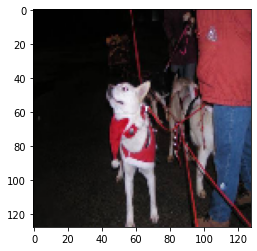

In [ ]:
plt.imshow(data[0][0])

In [ ]:
data[0][1]

0

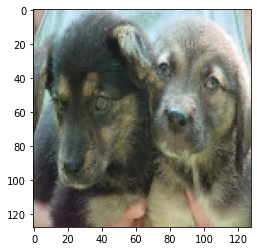

In [ ]:
plt.imshow(data[32][0])

In [ ]:
data[32][1]

0

In [ ]:
len(data)

25000

In [7]:
X_train = []
Y_train = []
X_test = []
Y_test = []
for i in range(0,len(data)) : 
  if i < 3000 : 
    X_test.append(data[i][0])
    Y_test.append(data[i][1])
  elif i < 13000 : 
    X_train.append(data[i][0])
    Y_train.append(data[i][1])
  else :
    break

In [8]:
len(X_test),len(X_train)

(3000, 10000)

In [9]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [10]:
X_train.shape,X_test.shape

((10000, 128, 128, 3), (3000, 128, 128, 3))

In [11]:
Y_train.shape,Y_test.shape

((10000,), (3000,))

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
Y_train[:50],Y_test[:20]

(array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 0, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0]))

In [14]:
model = Sequential()

In [15]:
model.add(layers.Conv2D(64,kernel_size=(3,3),input_shape=(128,128,3),activation='relu'))
model.add(layers.MaxPool2D())

model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D())

model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D())

model.add(layers.Flatten())

model.add(layers.Dense(128,activation='relu'))

model.add(layers.Dense(32,activation='relu'))

model.add(layers.Dense(1,activation='sigmoid'))


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
X_train.shape

(10000, 128, 128, 3)

In [19]:
model.fit(X_train,Y_train,validation_split=0.1,epochs=7)

Epoch 1/7
282/282 [==============================] - 41s 38ms/step - loss: 0.6687 - accuracy: 0.5746 - val_loss: 0.6376 - val_accuracy: 0.6490
Epoch 2/7
282/282 [==============================] - 10s 36ms/step - loss: 0.5976 - accuracy: 0.6806 - val_loss: 0.6202 - val_accuracy: 0.6630
Epoch 3/7
282/282 [==============================] - 10s 37ms/step - loss: 0.5329 - accuracy: 0.7249 - val_loss: 0.5444 - val_accuracy: 0.7190
Epoch 4/7
282/282 [==============================] - 10s 36ms/step - loss: 0.4880 - accuracy: 0.7619 - val_loss: 0.5166 - val_accuracy: 0.7470
Epoch 5/7
282/282 [==============================] - 10s 36ms/step - loss: 0.4262 - accuracy: 0.8006 - val_loss: 0.5004 - val_accuracy: 0.7560
Epoch 6/7
282/282 [==============================] - 10s 36ms/step - loss: 0.3638 - accuracy: 0.8323 - val_loss: 0.5375 - val_accuracy: 0.7550
Epoch 7/7
282/282 [==============================] - 10s 36ms/step - loss: 0.2751 - accuracy: 0.8807 - val_loss: 0.6189 - val_accuracy: 0.7620

In [20]:
Y_pred = model.predict(X_test)

In [27]:
Y_test[:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [30]:
final_pred = np.round(Y_pred)

In [31]:
final_pred.shape

(3000, 1)

In [32]:
Y_test.shape

(3000,)

In [35]:
final_pred = final_pred.reshape((3000,))

In [36]:
final_pred.shape

(3000,)

In [42]:
sum(Y_test == final_pred)/3000

0.7623333333333333

In [43]:
model.save('own_dogs_cats.h5')